In [1]:
# Set up and load data
# Includes
import sys
import os
import numpy as np
import json
import os


# Setup paths containing utility
curr_folder = os.getcwd()
sys.path.insert(0, os.path.join(curr_folder,'../app'))

# Utils imports for loading data
from utils import save_data, load_data, exists_datafolder
from utils import load_SQuAD_train, load_SQuAD_dev
from utils import get_foldername
from utils import merge_artfiles
from utils_EDAplots import plotbar_train_dev,plothist_train_dev

# Load the training data
arts_train = load_SQuAD_train()

# Load the testing data
arts_dev = load_SQuAD_dev()

# Merge train + dev together
Ntrain = len(arts_train)
Ndev = len(arts_dev)
print ("Narticles in train = " +  str(len(arts_train)))
print ("Narticles in dev = " +  str(len(arts_dev)))
arts = arts_train + arts_dev
Narticles = len(arts)

# Load blanks data (ground truth)
foldername = get_foldername('sq_pp_training')
arts3 = load_data('train.json',foldername) + load_data('dev.json',foldername)

# Make sure all titles match
all_title_pairs = [(a1['title'],a3['title']) for a1,a3 in zip(arts,arts3)]
titles_match_bool = [a1['title'] == a3['title'] for a1,a3 in zip(arts,arts3)]
print("Matching titles: {} \nTotal articles {}".format(sum(titles_match_bool),len(titles_match_bool)))

# Merge ground truth blanks with original data to get full dataset
from utils_SQuAD import merge_arts_paragraph_fields
list_of_fields = ['context_blanked','blank_classification']
arts = merge_arts_paragraph_fields(arts,arts3,list_of_fields)


Narticles in train = 442
Narticles in dev = 35
Matching titles: 477 
Total articles 477


In [2]:
# Import fig stuff
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statistics

In [3]:
# Take a subset of data
art = arts[:] #in this case, take everything

# Get ratio of blanks vs non-blanks in each article

For assesssing class imbalance

In [4]:
# art = arts[0:3]
# ID ratio of blanks to non-blanks
# cb

atot_words = []
atot_blanks = []
abw_ratio = []


for a in arts:
    # Total things up for each paragraph
    ptot_words = [len(p['blank_classification']) for p in a['paragraphs']] #Paragraph total words
    ptot_blanks = [sum(p['blank_classification']) for p in a['paragraphs']] #Paragraph total blanks
    
    # For articles
    atot_words.append(sum(ptot_words))
        # Total blanks per article
    atot_blanks.append(sum(ptot_blanks))
        # Ratio of blanks to words
    abw_ratio.append(sum(ptot_blanks)/sum(ptot_words)*100)

## Total words per article (including punctuation)

This means that individual punctuation marks will count as words (following AllenNLP's sentence splitting method)

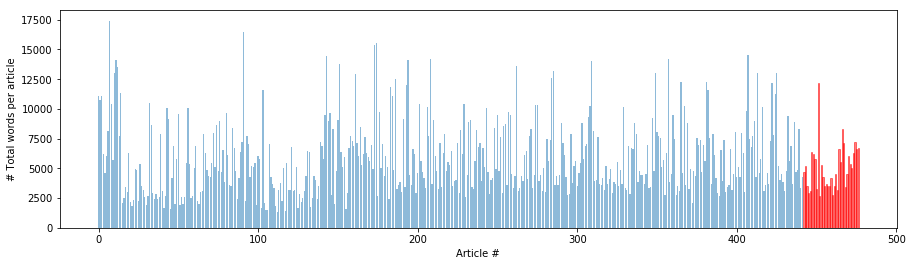

In [5]:

myvar = atot_words
varname = '# words'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

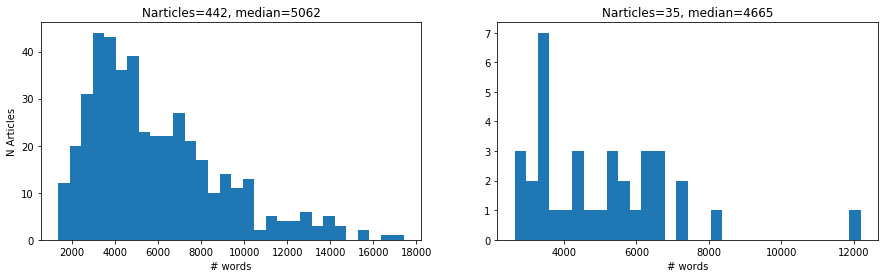

In [6]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Total blanks per article

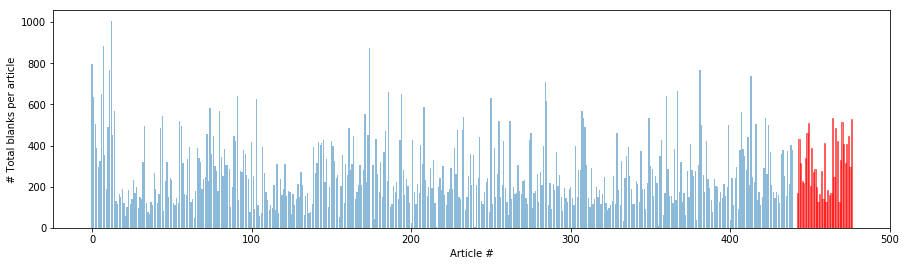

In [7]:

myvar = atot_blanks
varname = '# blanks'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

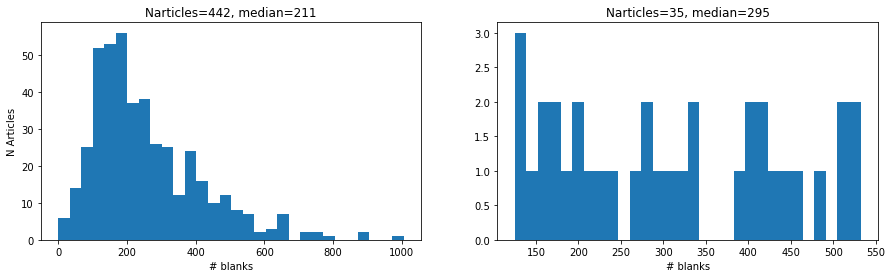

In [8]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

## Percentage of blanked words

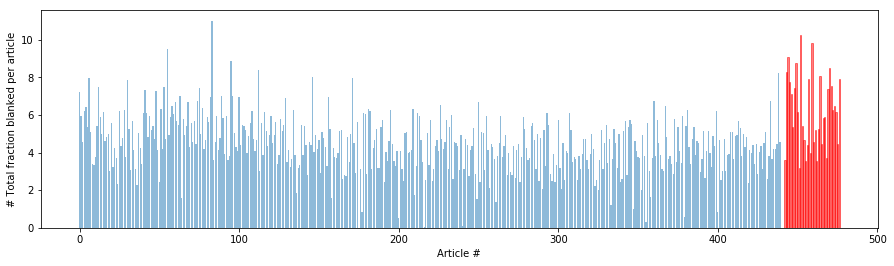

In [9]:

myvar = abw_ratio
varname = 'Percent blanked'

# Plot bargraph
plotbar_train_dev(myvar,Ntrain,Ndev,varname,xlabel='Article #')

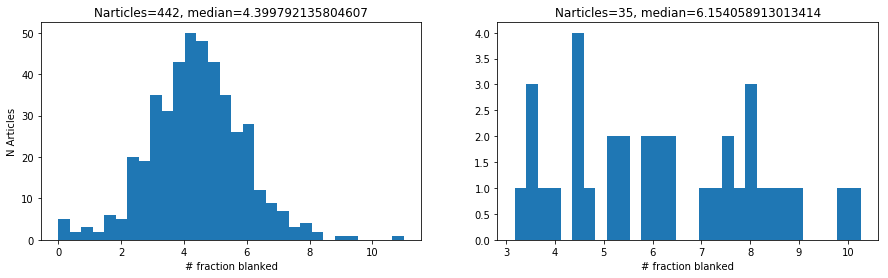

In [10]:

# Plot histogram
plothist_train_dev(myvar,Ntrain,Ndev,varname,ylabel='N Articles')

In [11]:
# All articles
Ntrain = len(arts_train)
Ndev = len(arts_dev)
print ("Narticles in train = " +  str(len(arts_train))) 
print ("Narticles in dev = " +  str(len(arts_dev))) 

Narticles in train = 442
Narticles in dev = 35


In [12]:
# Merge arts together
arts= arts_train + arts_dev
Narticles = len(arts)
print ("Narticles total = " +  str(len(arts))) 

Narticles total = 477
